Install Required Libraries

In [1]:
# %pip install openpyxl
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn

# # For Installing Libraries in Google Colab
# !pip install openpyxl
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn

import warnings
warnings.filterwarnings("ignore")

Import View first 5 rows of Dataset

In [2]:
import pandas as pd

# Load and View Dataset
df = pd.read_csv('databreaches650.csv')
df.head()

Name       Title          Domain  BreachDate            AddedDate  \
0  000webhost  000webhost  000webhost.com  2015-03-01  2015-10-26 23:35:45   
1       123RF       123RF       123rf.com  2020-03-22  2020-11-15 00:59:50   
2         126         126         126.com  2012-01-01  2016-10-08 07:46:05   
3     17Media          17        17app.co  2016-04-19  2016-07-08 01:55:03   
4       17173       17173       17173.com  2011-12-28  2018-04-28 04:53:15   

          ModifiedDate  PwnCount  \
0  2017-12-10 21:44:27  14936670   
1  2020-11-15 01:07:10   8661578   
2  2016-10-08 07:46:05   6414191   
3  2016-07-08 01:55:03   4009640   
4  2018-04-28 04:53:15   7485802   

                                         Description  \
0  In approximately March 2015, the free web host...   
1  In March 2020, the stock photo site <a href="h...   
2  In approximately 2012, it's alleged that the C...   
3  In April 2016, customer data obtained from the...   
4  In late 2011, <a href="https://news.softpedia....   

                                            LogoPath  \
0  https://haveibeenpwned.com/Content/Images/Pwne...   
1  https://haveibeenpwned.com/Content/Images/Pwne...   
2  https://haveibeenpwned.com/Content/Images/Pwne...   
3  https://haveibeenpwned.com/Content/Images/Pwne...   
4  https://haveibeenpwned.com/Content/Images/Pwne...   

                                         DataClasses  IsVerified  \
0  ['Email addresses', 'IP addresses', 'Names', '...        True   
1  ['Email addresses', 'IP addresses', 'Names', '...        True   
2                   ['Email addresses', 'Passwords']       False   
3  ['Device information', 'Email addresses', 'IP ...        True   
4      ['Email addresses', 'Passwords', 'Usernames']       False   

   IsFabricated  IsSensitive  IsRetired  IsSpamList  IsMalware  
0         False        False      False       False      False  
1         False        False      False       False      False  
2         False        False      False       False      False  
3         False        False      False       False      False  
4         False        False      False       False      False

Looking at dataset there are many NULL Values. We need to deal with irrelevant Columns and NULL Values

In [3]:
# View All Columns in Dataset
df.columns

Index(['Name', 'Title', 'Domain', 'BreachDate', 'AddedDate', 'ModifiedDate',
       'PwnCount', 'Description', 'LogoPath', 'DataClasses', 'IsVerified',
       'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList', 'IsMalware'],
      dtype='object')

In [4]:
# Check Columns and their types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          650 non-null    object
 1   Title         650 non-null    object
 2   Domain        624 non-null    object
 3   BreachDate    650 non-null    object
 4   AddedDate     650 non-null    object
 5   ModifiedDate  650 non-null    object
 6   PwnCount      650 non-null    int64 
 7   Description   650 non-null    object
 8   LogoPath      650 non-null    object
 9   DataClasses   650 non-null    object
 10  IsVerified    650 non-null    bool  
 11  IsFabricated  650 non-null    bool  
 12  IsSensitive   650 non-null    bool  
 13  IsRetired     650 non-null    bool  
 14  IsSpamList    650 non-null    bool  
 15  IsMalware     650 non-null    bool  
dtypes: bool(6), int64(1), object(9)
memory usage: 54.7+ KB
None


In [5]:
# Check Null values in dataset
print(df.isnull().sum())

Name             0
Title            0
Domain          26
BreachDate       0
AddedDate        0
ModifiedDate     0
PwnCount         0
Description      0
LogoPath         0
DataClasses      0
IsVerified       0
IsFabricated     0
IsSensitive      0
IsRetired        0
IsSpamList       0
IsMalware        0
dtype: int64


Lets Pivot our dataset and check which domains are most pawed again and again according to our data

In [6]:
domains_Pivot = df.pivot_table(index = ['Domain'], aggfunc ='size').sort_values(ascending=False)
column_names_list = domains_Pivot.index.tolist()
occurances_list = domains_Pivot.values.tolist()

Plot Top Most Hacked websites and their Number of being hacked

Text(0.5, 1.0, 'Top Most Hacked Websites')

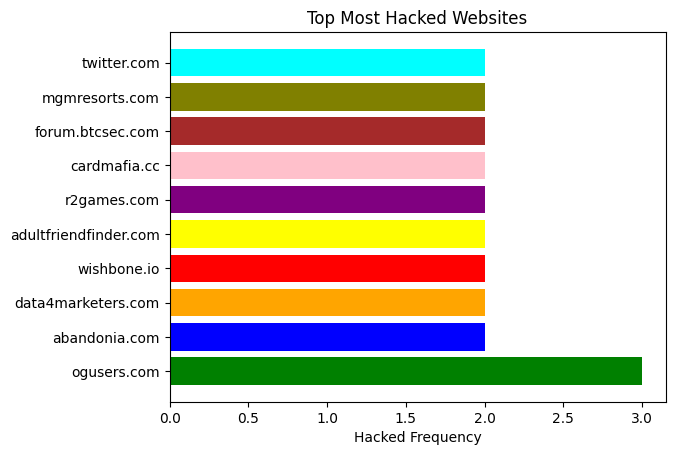

In [7]:
import matplotlib.pyplot as plt

# How Many Top Websites you want to Visualize
top_websites_count = 10

colors_list = ['green', 'blue', 'orange', 'red','yellow','purple','pink','brown','olive','cyan','gray']

# As I have Only listed 11 Colors so use the colors only if we are displying upto top 11 Values
# Otherwise do not use the colors
if top_websites_count <= len(colors_list):
    plt.barh(column_names_list[:top_websites_count], occurances_list[:top_websites_count], color=colors_list[:top_websites_count])
else:
    plt.barh(column_names_list[:top_websites_count], occurances_list[:top_websites_count])

plt.xlabel('Hacked Frequency')
plt.title('Top Most Hacked Websites')

We have several Columns having Boolean Values, Lets explore their data

Text(0.5, 1.0, 'Data Distributution for IsVerified')

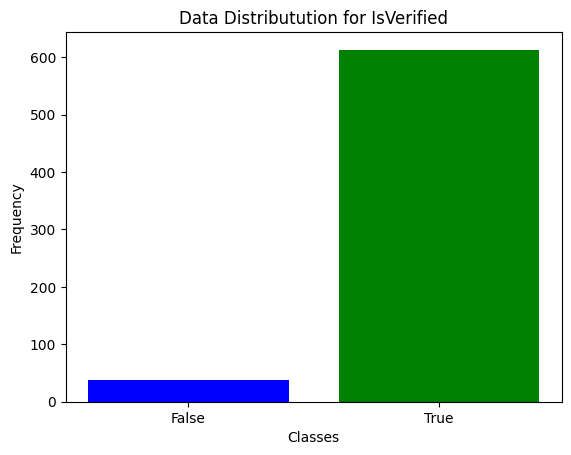

In [8]:
# Lets Make Pivot Table to get grouped values and their counts of classes
isverified_pivot = df.pivot_table(index = ['IsVerified'], aggfunc ='size').sort_values(ascending=False)
column_names_list = isverified_pivot.index.tolist()
occurances_list = isverified_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsVerified')

We can see most of the websites in our dataset are verified as hacked

Lets now explore the Column IsFabricated

Text(0.5, 1.0, 'Data Distributution for IsFabricated')

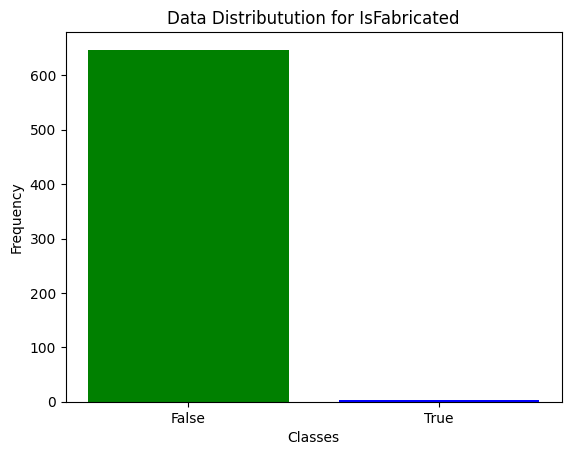

In [9]:
# Lets Make Pivot Table to get grouped values and their counts of classes
isfabricated_pivot = df.pivot_table(index = ['IsFabricated'], aggfunc ='size').sort_values(ascending=False)
column_names_list = isfabricated_pivot.index.tolist()
occurances_list = isfabricated_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsFabricated')

We can see there are only few around 0.5% of total websites in the dataset are fabricated

Lets now explore the Column IsSensitive

Text(0.5, 1.0, 'Data Distributution for IsSensitive')

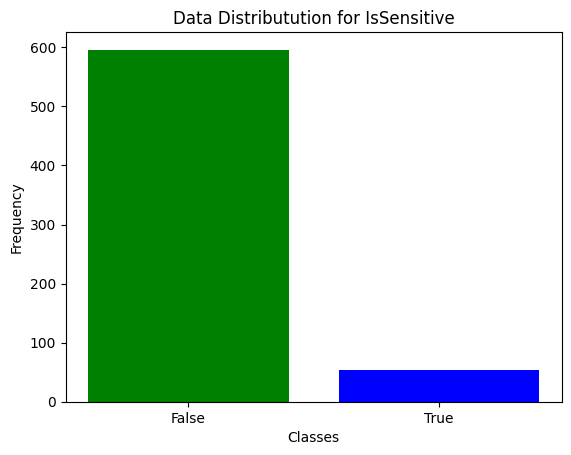

In [10]:
# Lets Make Pivot Table to get grouped values and their counts of classes
issensitive_pivot = df.pivot_table(index = ['IsSensitive'], aggfunc ='size').sort_values(ascending=False)
column_names_list = issensitive_pivot.index.tolist()
occurances_list = issensitive_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsSensitive')

We can see there are only few around 1% of total websites in the dataset are marked as Sensitive

Lets now explore the Column IsRetired

Text(0.5, 1.0, 'Data Distributution for IsRetired')

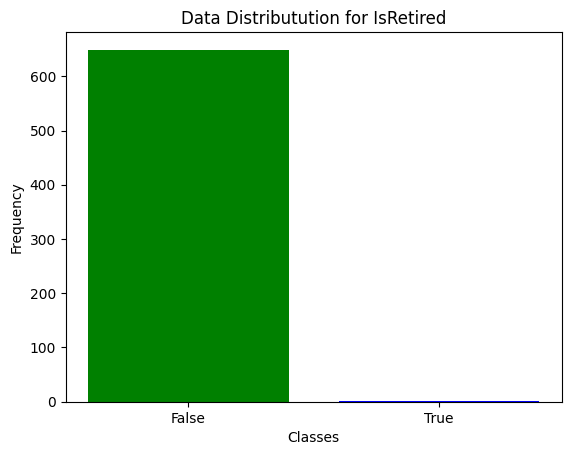

In [11]:
# Lets Make Pivot Table to get grouped values and their counts of classes
isretired_pivot = df.pivot_table(index = ['IsRetired'], aggfunc ='size').sort_values(ascending=False)
column_names_list = isretired_pivot.index.tolist()
occurances_list = isretired_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsRetired')

We can see there is only 1 out of 650 total websites in the dataset is marked as Retired or its data is removed

Lets now explore the Column IsSpamList

Text(0.5, 1.0, 'Data Distributution for IsSpamList')

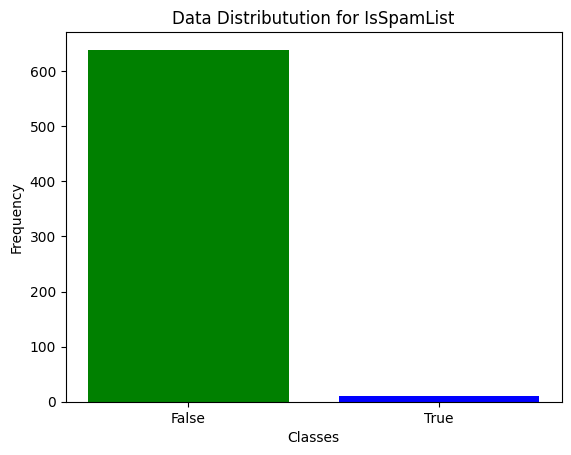

In [12]:
# Lets Make Pivot Table to get grouped values and their counts of classes
isspamlist_pivot = df.pivot_table(index = ['IsSpamList'], aggfunc ='size').sort_values(ascending=False)
column_names_list = isspamlist_pivot.index.tolist()
occurances_list = isspamlist_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsSpamList')

We can see there are only 1.7% out of total websites in the dataset are marked as SpamList meaning that most of the website are listed are breached due to Security compromise

Lets now explore the Column IsMalware

Text(0.5, 1.0, 'Data Distributution for IsMalware')

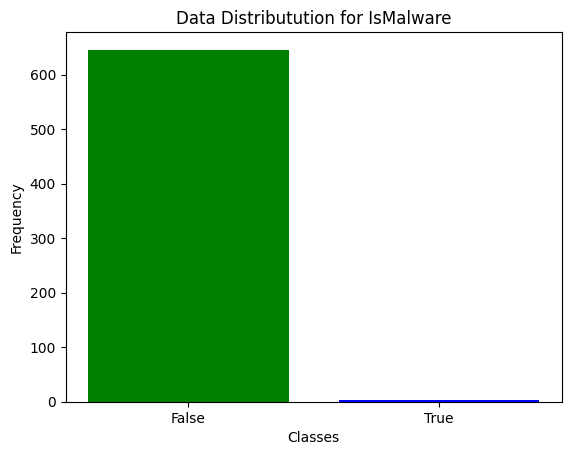

In [13]:
# Lets Make Pivot Table to get grouped values and their counts of classes
ismalware_pivot = df.pivot_table(index = ['IsMalware'], aggfunc ='size').sort_values(ascending=False)
column_names_list = ismalware_pivot.index.tolist()
occurances_list = ismalware_pivot.values.tolist()

# Plot the Values on Cart
plt.bar(column_names_list, occurances_list, color=["green", "blue"])
plt.xticks(column_names_list, column_names_list)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Data Distributution for IsMalware')

We can see that less than 1% of total websites in the dataset are marked as Malware Breaches meaning that most of the website are listed are breached due to Security compromise instead of a Malware Campaign

Lets Start Data Preprocessing to make our data ready for Training

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          650 non-null    object
 1   Title         650 non-null    object
 2   Domain        624 non-null    object
 3   BreachDate    650 non-null    object
 4   AddedDate     650 non-null    object
 5   ModifiedDate  650 non-null    object
 6   PwnCount      650 non-null    int64 
 7   Description   650 non-null    object
 8   LogoPath      650 non-null    object
 9   DataClasses   650 non-null    object
 10  IsVerified    650 non-null    bool  
 11  IsFabricated  650 non-null    bool  
 12  IsSensitive   650 non-null    bool  
 13  IsRetired     650 non-null    bool  
 14  IsSpamList    650 non-null    bool  
 15  IsMalware     650 non-null    bool  
dtypes: bool(6), int64(1), object(9)
memory usage: 54.7+ KB
None


In [15]:
import numpy as np
from datetime import datetime
from sklearn import preprocessing


encoder = preprocessing.LabelEncoder()

# We have the domain PIVOT we can use it to add breach count feature to our dataset
breaches_dict = domains_Pivot.to_dict()

# Map the values and add new column BreachedCount
df["BreachedCount"] = df["Domain"].map(breaches_dict)

# We have a DataClasses Column, So what we are gonna do is to get count of DataClasses instead of taking all classes names
df["DataClassesCount"] = df.apply(lambda x: len(x['DataClasses']), axis=1)

# Drop Title as we don't need it to train our model
df = df.drop('Title',axis=1)

# Drop Description as we don't need it to train our model
df = df.drop('Description',axis=1)

# Drop Name as we don't need it to train our model
df = df.drop('Name',axis=1)

# Drop LogoPath as we don't need it to train our model
df = df.drop('LogoPath',axis=1)

# Drop DataClasses as we don't need it anymore to train our model
df = df.drop('DataClasses',axis=1)

# Drop Domain as we don't need it anymore to train our model
df = df.drop('Domain',axis=1)


# There are some date type columns lets deal with them by taking
# the difference between dates to get number of days and drop
# the date columns


# Dates are in String Lets Convert them to date type first
df['BreachDate'] = pd.to_datetime(df['BreachDate'])
df['AddedDate'] = pd.to_datetime(df['AddedDate'])

# Convert Them in Ordinal So that we can Take Difference Between them
df['BreachDate'] = df['BreachDate'].map(datetime.toordinal)
df['AddedDate'] = df['AddedDate'].map(datetime.toordinal)

# OK Now we have our columns in datetime format, Lets do one thing
# Apply some FEATURE ENGINEERING to derive new features based on these dates

# Take the difference between the date of Addition to HIBP Website and Website Breach Date
df['diff_breach_addition'] = df['AddedDate'] - df['BreachDate']

# We have got out required featured lets drop the date columns
df = df.drop(['BreachDate','AddedDate', 'ModifiedDate'],axis=1)

# Lets label Encode Categorical Features (Boolean Values)
df['IsVerified'] = encoder.fit_transform(df['IsVerified'].astype(str))
df['IsFabricated'] = encoder.fit_transform(df['IsFabricated'].astype(str))
df['IsSensitive'] = encoder.fit_transform(df['IsSensitive'].astype(str))
df['IsRetired'] = encoder.fit_transform(df['IsRetired'].astype(str))
df['IsSpamList'] = encoder.fit_transform(df['IsSpamList'].astype(str))
df['IsMalware'] = encoder.fit_transform(df['IsMalware'].astype(str))

# We have some NULL values on BreachedCount lets fill them with 0
df['BreachedCount'] = df['BreachedCount'].fillna(value=0)
df['BreachedCount'] = df['BreachedCount'].astype(int)

In [16]:
# Check Null values in dataset after PRE-PROCESSING
print(df.isnull().sum())

PwnCount                0
IsVerified              0
IsFabricated            0
IsSensitive             0
IsRetired               0
IsSpamList              0
IsMalware               0
BreachedCount           0
DataClassesCount        0
diff_breach_addition    0
dtype: int64


Great Now we do not have null values and out Data is Almost Ready
Lets Check the Correlation between Features

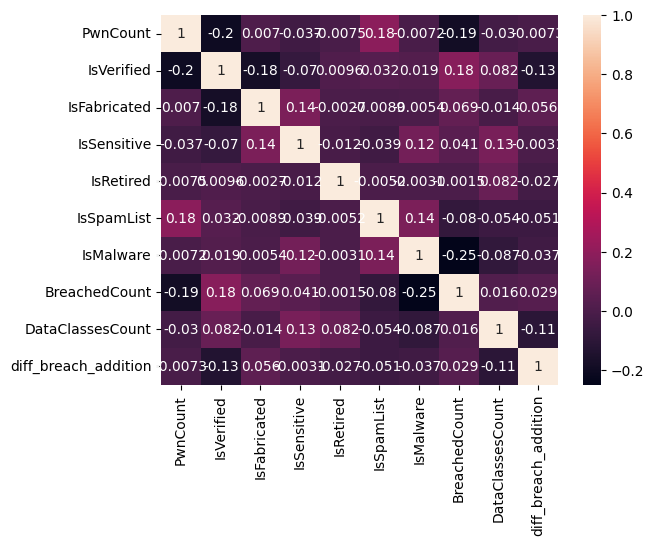

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

Correlation Shows there is not very strong corelation between columns, So we donot need to drop any further column

OK Lets use IsSensitive Column as out Target column for out model training

In [18]:
# View Unique Classes to be used for Prediction
df['IsSensitive'].nunique()

2

In [19]:
# Print Dataset Description - (Check the Statistics of our Dataset)
print(df.describe())

           PwnCount  IsVerified  IsFabricated  IsSensitive   IsRetired  \
count  6.500000e+02  650.000000    650.000000   650.000000  650.000000   
mean   1.914278e+07    0.943077      0.004615     0.083077    0.001538   
std    7.502362e+07    0.231874      0.067832     0.276211    0.039223   
min    8.580000e+02    0.000000      0.000000     0.000000    0.000000   
25%    2.977595e+05    1.000000      0.000000     0.000000    0.000000   
50%    1.131432e+06    1.000000      0.000000     0.000000    0.000000   
75%    6.299590e+06    1.000000      0.000000     0.000000    0.000000   
max    7.729050e+08    1.000000      1.000000     1.000000    1.000000   

       IsSpamList   IsMalware  BreachedCount  DataClassesCount  \
count  650.000000  650.000000     650.000000        650.000000   
mean     0.016923    0.006154       1.012308         87.856923   
std      0.129083    0.078265       0.318658         53.634638   
min      0.000000    0.000000       0.000000         19.000000   
25%

Lets Start Training Our Naive Bayes Model

In [20]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

tdata=df.copy()

# Split the data into features (X) and target (Y)
X = tdata[['PwnCount','IsVerified','IsFabricated','IsSensitive','IsRetired','IsSpamList','BreachedCount','DataClassesCount','diff_breach_addition']]
Y = tdata['IsSensitive']

# We do not need to Convert categorical variables to numerical using one-hot encoding
# Because we do not have any categorical values left


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Naive Bayees model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Make predictions on the test set
Y_pred = nb.predict(X_test_scaled)

# Evaluate the performance of the model
nb_accuracy = accuracy_score(y_test, Y_pred)
nb_precision = precision_score(y_test, Y_pred)
nb_recall = recall_score(y_test, Y_pred)
nb_f1 = f1_score(y_test, Y_pred)

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(nb_accuracy))
print('Precision: {:.2f}'.format(nb_precision))
print('Recall: {:.2f}'.format(nb_recall))
print('F1 Score: {:.2f}'.format(nb_f1))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Lets Train Another Model with Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train and Evaluate Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred_rf)
rfc_precision = precision_score(y_test, y_pred_rf)
rfc_recall = recall_score(y_test, y_pred_rf)
rfc_f1 = f1_score(y_test, y_pred_rf)
print('\nRandom Forest Model')
print('Accuracy:', rfc_accuracy)
print('Precision:', rfc_precision)
print('Recall:', rfc_recall)
print('F1 Score:', rfc_f1)


Random Forest Model
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [22]:
# Now make a new dataframe with test data
pred_df = pd.DataFrame(y_test)
pred_df.rename(columns={'IsMalware':'Actual'}, inplace=True)

In [23]:
# Get Predictions from both Models
pred_df['nb_pred'] = nb.predict(X_test_scaled)
pred_df['rf_pred'] = rf.predict(X_test)

In [24]:
# Show Side by Side Comparision of Actual Class and Predicted Classes by both Models
print(pred_df.head(20))

     IsSensitive  nb_pred  rf_pred
637            0        0        0
220            0        0        0
428            0        0        0
326            0        0        0
72             0        0        0
516            0        0        0
181            0        0        0
131            0        0        0
231            0        0        0
277            1        1        1
607            0        0        0
281            0        0        0
249            0        0        0
81             0        0        0
615            0        0        0
247            0        0        0
363            0        0        0
643            1        1        1
69             0        0        0
10             0        0        0


In [25]:
print('---REPORT---')



---REPORT---


- Both Models have 100% Accuracy and looking at prediction result we can assume we will be able to correctly predict the sensitive data breach websites
- The reason Evaluation Matrices are 100% because of unbalanced classes, The number of True values are very low as compared to False Classes around 1% is Positive class